In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [62]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [7]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

In [9]:
input_path = '/Users/charisoneyemi/Downloads/THESISFOLDER/FinalDataset/final_dataset_DS.csv'

df = pd.read_csv(input_path, parse_dates=['First_Purchase', 'Last_Purchase'], dayfirst=False, infer_datetime_format=True)

print("Loaded dataframe shape:", df.shape)
df.head(3)

Loaded dataframe shape: (5027, 34)


/var/folders/cl/ff5rh4051lng0tpll0yl64q40000gn/T/ipykernel_94395/1148847465.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(input_path, parse_dates=['First_Purchase', 'Last_Purchase'], dayfirst=False, infer_datetime_format=True)


,Response ID,First_Purchase,Last_Purchase,Purchase_Days,Total_Quantity,Total_Spent,Unique_Products,Unique_Categories,Recency_Days,Frequency,Avg_Order_Value,Avg_Quantity_Per_Order,Age Group,Hispanic Origin,Race,Education,Household Income,Gender Identity,Sexual Orientation,State Reported,Account Shared With,Household Size,Amazon Order Frequency,Smoke Cigarettes,Smoke Marijuana,Drink Alcohol,Diabetes,Wheelchair,Life Changes 2021,Opinion: Amazon Sell Data,Opinion: Companies Sell Data,Opinion: SMB Data Access,Opinion: Census Use Data,Opinion: Research Use Data
0,R_01vNIayewjIIKMF,2018-12-04,2022-06-10,80,146.0,4920.01,91,51,797,80,61.500125,1.825000,35 - 44 years,Yes,Black or African American,Bachelor's degree,"$25,000 - $49,999",Male,heterosexual (straight),New Jersey,1 (just me!),1 (just me!),Less than 5 times per month,No,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
1,R_037XK72IZBJyF69,2018-01-18,2022-12-13,305,1306.0,17589.89,949,363,611,305,57.671770,4.281967,55 - 64 years,No,White or Caucasian,Bachelor's degree,"$25,000 - $49,999",Female,heterosexual (straight),Pennsylvania,1 (just me!),2,Less than 5 times per month,No,No,Yes,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,No,Yes
2,R_038ZU6kfQ5f89fH,2018-12-18,2022-02-23,27,73.0,4247.54,53,35,904,27,157.316296,2.703704,25 - 34 years,No,White or Caucasian,High school diploma or GED,"$25,000 - $49,999",Male,heterosexual (straight),California,1 (just me!),1 (just me!),Less than 5 times per month,No,No,No,No,No,Lost a job,Yes,Yes,No,No,Yes


In [11]:
print("Missing values per column:")
print(df.isna().sum().sort_values(ascending=False).head(30))

Missing values per column:
Life Changes 2021               3384
Response ID                        0
Drink Alcohol                      0
State Reported                     0
Account Shared With                0
Household Size                     0
Amazon Order Frequency             0
Smoke Cigarettes                   0
Smoke Marijuana                    0
Diabetes                           0
First_Purchase                     0
Wheelchair                         0
Opinion: Amazon Sell Data          0
Opinion: Companies Sell Data       0
Opinion: SMB Data Access           0
Opinion: Census Use Data           0
Sexual Orientation                 0
Gender Identity                    0
Household Income                   0
Education                          0
Race                               0
Hispanic Origin                    0
Age Group                          0
Avg_Quantity_Per_Order             0
Avg_Order_Value                    0
Frequency                          0
Recency_Day

In [13]:
if 'Life Changes 2021' in df.columns:
    df.drop(columns=['Life Changes 2021'], inplace=True)

In [15]:
behavioral_features = [
    'Avg_Quantity_Per_Order',
    'Avg_Order_Value',
    'Frequency',
    'Recency_Days',
    'Unique_Categories',
    'Unique_Products',
    'Total_Spent'
]

In [17]:
X_behav = df[behavioral_features].copy()

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_behav)

In [21]:
print("Scaled feature matrix shape:", X_scaled.shape)

Scaled feature matrix shape: (5027, 7)


In [23]:
sil_scores = []
k_values = range(2, 10)


In [25]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

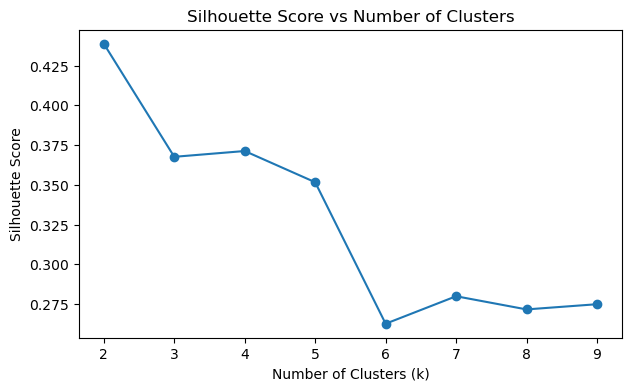

In [27]:
plt.figure(figsize=(7,4))
plt.plot(k_values, sil_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [29]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"k={k}: Silhouette={sil:.3f}, CH={ch:.1f}, DB={db:.3f}")


k=2: Silhouette=0.439, CH=2680.5, DB=0.996
k=3: Silhouette=0.368, CH=1976.8, DB=1.323
k=4: Silhouette=0.371, CH=1859.3, DB=1.164
k=5: Silhouette=0.352, CH=2003.5, DB=1.061
k=6: Silhouette=0.263, CH=1895.4, DB=1.069
k=7: Silhouette=0.280, CH=1918.8, DB=1.011
k=8: Silhouette=0.272, CH=1823.3, DB=1.075
k=9: Silhouette=0.275, CH=1727.3, DB=1.046


In [31]:
best_k = 2
kmeans_final = KMeans(n_clusters=best_k, random_state=RANDOM_STATE)
df['Behavior_Segment'] = kmeans_final.fit_predict(X_scaled)

print(df['Behavior_Segment'].value_counts())
df.groupby('Behavior_Segment')[behavioral_features].mean()

Behavior_Segment
0    3897
1    1130
Name: count, dtype: int64


,Avg_Quantity_Per_Order,Avg_Order_Value,Frequency,Recency_Days,Unique_Categories,Unique_Products,Total_Spent
Behavior_Segment,,,,,,,
0,2.223512,52.873373,97.257634,631.206313,88.812163,158.391840,4784.094639
1,2.828038,60.458654,394.600000,575.576991,285.150442,732.590265,22486.740097


In [33]:
print(df.columns.tolist())

['Response ID', 'First_Purchase', 'Last_Purchase', 'Purchase_Days', 'Total_Quantity', 'Total_Spent', 'Unique_Products', 'Unique_Categories', 'Recency_Days', 'Frequency', 'Avg_Order_Value', 'Avg_Quantity_Per_Order', 'Age Group', 'Hispanic Origin', 'Race', 'Education', 'Household Income', 'Gender Identity', 'Sexual Orientation', 'State Reported', 'Account Shared With', 'Household Size', 'Amazon Order Frequency', 'Smoke Cigarettes', 'Smoke Marijuana', 'Drink Alcohol', 'Diabetes', 'Wheelchair', 'Opinion: Amazon Sell Data', 'Opinion: Companies Sell Data', 'Opinion: SMB Data Access', 'Opinion: Census Use Data', 'Opinion: Research Use Data', 'Behavior_Segment']


In [35]:
numeric_features = [
    'Unique_Products', 'Unique_Categories',
    'Recency_Days', 'Frequency', 'Avg_Order_Value', 'Avg_Quantity_Per_Order'
]

In [37]:
categorical_features = [
    'Age Group', 'Hispanic Origin', 'Race', 'Education', 'Household Income',
    'Gender Identity', 'Sexual Orientation', 'State Reported',
    'Account Shared With', 'Household Size', 'Amazon Order Frequency',
    'Smoke Cigarettes', 'Smoke Marijuana', 'Drink Alcohol', 'Diabetes', 'Wheelchair',
    'Opinion: Amazon Sell Data', 'Opinion: Companies Sell Data',
    'Opinion: SMB Data Access', 'Opinion: Census Use Data', 'Opinion: Research Use Data',
    'Behavior_Segment'   # from clustering
]

In [39]:
target = 'Total_Spent'
X = df[numeric_features + categorical_features]
y = df[target]


In [41]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE
)

In [47]:
rf = RandomForestRegressor(random_state=RANDOM_STATE)


pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', rf)
])

In [49]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, None],
    'model__min_samples_split': [2, 5, 10]
}

In [51]:
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Unique_Products',
                                                                          'Unique_Categories',
                                                                          'Recency_Days',
                                                                          'Frequency',
                                                                          'Avg_Order_Value',
                                                                          'Avg_Quantity_Per_Order']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Age '
                                                                          'Group',
                                                                          'Hispanic '
                                                                          'Origin',
                                                                          'Race',
                                                                          'Education',
                                                                          'Household '
                                                                          'Income',
                                                                          'Gender...
                                                                          'Opinion: '
                                                                          'Companies '
                                                                          'Sell '
                                                                          'Data',
                                                                          'Opinion: '
                                                                          'SMB '
                                                                          'Data '
                                                                          'Access',
                                                                          'Opinion: '
                                                                          'Census '
                                                                          'Use '
                                                                          'Data',
                                                                          'Opinion: '
                                                                          'Research '
                                                                          'Use '
                                                                          'Data',
                                                                          'Behavior_Segment'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 10, None],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [53]:
print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

Best parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best CV score (MSE): -2672437.791650636


In [55]:
best_model = grid_search.best_estimator_

In [64]:
y_pred = best_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 2325.0385966495774
MAE: 502.5508620127285
R²: 0.9425373633887946


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### OVERFITTING VALIDATION

In [66]:
y_train_pred = best_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [68]:
print(f"\nTraining Set Performance:")
print(f"  R²: {r2_train:.4f}")
print(f"  RMSE: ${rmse_train:,.2f}")
print(f"  MAE: ${mae_train:,.2f}")


Training Set Performance:
  R²: 0.9967
  RMSE: $566.60
  MAE: $170.27


In [70]:
print(f"\nTest Set Performance:")
print(f"  R²: {r2:.4f}")
print(f"  RMSE: ${rmse:,.2f}")
print(f"  MAE: ${mae:,.2f}")


Test Set Performance:
  R²: 0.9425
  RMSE: $2,325.04
  MAE: $502.55


In [72]:
print(f"\nGeneralization Analysis:")
r2_diff = abs(r2_train - r2)
print(f"  R² difference (train - test): {r2_diff:.4f}")
print(f"  R² difference percentage: {(r2_diff/r2_train)*100:.2f}%")


Generalization Analysis:
  R² difference (train - test): 0.0541
  R² difference percentage: 5.43%


In [74]:
if r2_diff < 0.05:
    print("Minimal overfitting detected (difference < 0.05)")
    print("Model generalizes well to unseen data")
elif r2_diff < 0.10:
    print("Moderate overfitting (difference 0.05-0.10)")
    print("Model shows acceptable generalization")
else:
    print("Significant overfitting detected (difference > 0.10)")
    print("Consider regularization or simpler model")

Moderate overfitting (difference 0.05-0.10)
Model shows acceptable generalization


In [76]:
cv_results = grid_search.cv_results_
best_idx = grid_search.best_index_
cv_scores_mse = -cv_results['mean_test_score']

In [78]:
variance_y = y_train.var()
cv_r2_all = 1 - (cv_scores_mse / variance_y)
best_cv_r2 = cv_r2_all[best_idx]

In [80]:
print(f"\nCross-Validation Performance (5-fold):")
print(f"  Mean CV R² (best model): {best_cv_r2:.4f}")
print(f"  Best CV MSE: ${cv_scores_mse[best_idx]:,.2f}")


Cross-Validation Performance (5-fold):
  Mean CV R² (best model): 0.9722
  Best CV MSE: $2,672,437.79


In [84]:
print(f"\nModel Stability Check:")
print(f"  Test R² vs CV R²: {r2:.4f} vs {best_cv_r2:.4f}")
if abs(r2 - best_cv_r2) < 0.05:
    print("Consistent performance across folds and test set")
else:
    print("Some variation between CV and test performance")


Model Stability Check:
  Test R² vs CV R²: 0.9425 vs 0.9722
Consistent performance across folds and test set


In [86]:
cat_cols = best_model.named_steps['preprocess'].transformers_[1][1].get_feature_names_out(categorical_features)
num_cols = numeric_features
all_features = np.concatenate([num_cols, cat_cols])

In [88]:
importances = best_model.named_steps['model'].feature_importances_

In [90]:
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False).head(20)

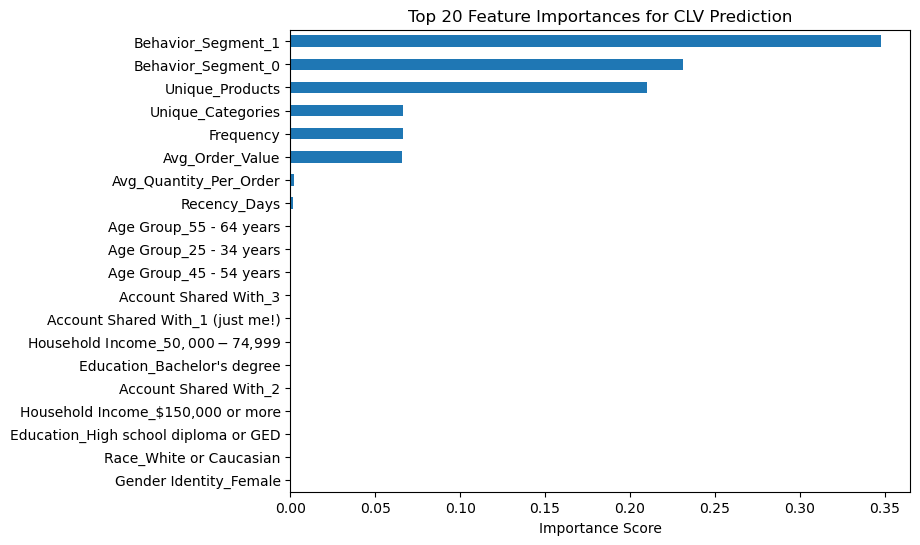

In [92]:
plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances for CLV Prediction')
plt.xlabel('Importance Score')
plt.show()

In [94]:
import pandas as pd
import numpy as np

cat_cols = best_model.named_steps['preprocess'].transformers_[1][1].get_feature_names_out(categorical_features)
num_cols = numeric_features
all_features = np.concatenate([num_cols, cat_cols])
importances = best_model.named_steps['model'].feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
})

behavioral_keywords = ['Behavior_Segment', 'Unique_Products', 'Unique_Categories', 
                       'Frequency', 'Recency_Days', 'Avg_Order_Value', 'Avg_Quantity_Per_Order']

feat_imp_df['Type'] = feat_imp_df['Feature'].apply(
    lambda x: 'Behavioral' if any(k in x for k in behavioral_keywords) else 'Demographic'
)

behavioral_total = feat_imp_df[feat_imp_df['Type'] == 'Behavioral']['Importance'].sum()
demographic_total = feat_imp_df[feat_imp_df['Type'] == 'Demographic']['Importance'].sum()

print(f"Behavioral features: {behavioral_total*100:.1f}%")
print(f"Demographic features: {demographic_total*100:.1f}%")
print(f"\nBreakdown of behavioral features:")

for feature in ['Behavior_Segment_0', 'Behavior_Segment_1', 'Unique_Products', 
                'Unique_Categories', 'Frequency', 'Recency_Days', 
                'Avg_Order_Value', 'Avg_Quantity_Per_Order']:
    if feature in feat_imp_df['Feature'].values:
        imp = feat_imp_df[feat_imp_df['Feature'] == feature]['Importance'].values[0]
        print(f"  {feature}: {imp*100:.1f}%")

Behavioral features: 99.1%
Demographic features: 0.9%

Breakdown of behavioral features:
  Behavior_Segment_0: 23.1%
  Behavior_Segment_1: 34.8%
  Unique_Products: 21.0%
  Unique_Categories: 6.7%
  Frequency: 6.6%
  Recency_Days: 0.2%
  Avg_Order_Value: 6.6%
  Avg_Quantity_Per_Order: 0.2%


In [96]:
df_out = df.copy()
df_out['CLV_Predicted'] = best_model.predict(X)

In [98]:
output_path = '/Users/charisoneyemi/Downloads/THESISFOLDER/FinalDataset/clustering_work.csv'
df_out.to_csv(output_path, index=False)
print("Saved new dataset with predictions to:", output_path)

Saved new dataset with predictions to: /Users/charisoneyemi/Downloads/THESISFOLDER/FinalDataset/clustering_work.csv
